In [1]:
# Projet 1
# INFO 3510 | Music as Information
# David LaPaglia

# How does sentiment in music change over time?


# https://github.com/johnwmillr/LyricsGenius/pull/162
# https://lyricsgenius.readthedocs.io/en/master/reference/genius.html
# https://www.w3schools.com/python/python_try_except.asp

In [2]:
import requests
import os
from dotenv import load_dotenv

import altair as alt
import seaborn as sns
import pandas as pd


from nltk.sentiment.vader import SentimentIntensityAnalyzer




load_dotenv('3510.env')

clientID = os.getenv("SPOTIFY_CLIENT_ID")
clientSecret = os.getenv("SPOTIFY_CLIENT_SECRET")


geniusClient = os.getenv("GENIUS_CLIENT_ID")
geniusSecret = os.getenv("GENIUS_CLIENT_SECRET")
geniusClientAccess = os.getenv("GENIUS_CLIENT_ACCESS_TOKEN")

timeout = 10
grantType = 'client_credentials'
bodyParams = {'grant_type': grantType}
url = "https://accounts.spotify.com/api/token"
responseJSON = requests.post(url,data=bodyParams,auth=(clientID,clientSecret)).json()

rootURL = 'https://api.spotify.com/v1/'
headers = {"Authorization":"Bearer "+responseJSON['access_token']}

# Data source: Spotify API, getting the list of all of our songs!

In [4]:
playlistSearch = requests.get(rootURL +'playlists/59VV1FP9jNO8TwbHCkna5t',headers=headers).json()
playlistSearch.keys()

dict_keys(['collaborative', 'description', 'external_urls', 'followers', 'href', 'id', 'images', 'name', 'owner', 'primary_color', 'public', 'snapshot_id', 'tracks', 'type', 'uri'])

In [5]:
count = 0
for song in range(0,99): #There are 100 songs
    count+=1
    songName = playlistSearch['tracks']['items'][count]['track']['name']
    artistName = playlistSearch['tracks']['items'][count]['track']['artists'][0]['name']
    print(songName,", ",artistName)



Sweet Georgia Brown ,  Ben Bernie
Horses - Take 2 ,  George Olsen
My Blue Heaven ,  Gene Austin
Makin' Whoopee ,  Eddie Cantor
Tiptoe Through The Tulips ,  Nick Lucas
Puttin' on the Ritz ,  Fred Astaire
Minnie the Moocher (Theme Song) ,  Cab Calloway
It Don't Mean a Thing (If It Ain't Got That Swing) ,  Duke Ellington
Stormy Weather ,  Ethel Waters
The Very Thought of You ,  Ray Noble
Top Hat, White Tie And Tails ,  Fred Astaire
Pennies From Heaven - Single Version ,  Bing Crosby
Sing, Sing, Sing ,  Benny Goodman
Jeepers Creepers ,  Paul Whiteman & His Orchestra
Over The Rainbow ,  Judy Garland
I'll Never Smile Again ,  The Ink Spots
Boogie Woogie Bugle Boy ,  The Andrews Sisters
Paper Doll ,  The Mills Brothers
That Ain't Right ,  Fats Waller
The Trolley Song ,  Judy Garland
This Land is Your Land ,  Woody Guthrie
Five Minutes More ,  Frank Sinatra
La Vie en rose ,  Édith Piaf
Buttons And Bows ,  Dinah Shore
Some Enchanted Evening ,  Ezio Pinza
Goodnight Irene ,  The Weavers
Unforgett

# Data source: Lyrics genius API getting all of our lyrics for all of our songs!

In [7]:
import lyricsgenius as lg 
genius = lg.Genius(geniusClientAccess,sleep_time=0.2,retries=4) #the key to this project

In [8]:
count = 0
songDict={}
year = 1924
for song in range(0,99): # should be 0,99 #There are 100 songs
    count+=1
    year +=1
    songName = playlistSearch['tracks']['items'][count]['track']['name']
    artistName = playlistSearch['tracks']['items'][count]['track']['artists'][0]['name']
    

    
    songLyrics = genius.search_song(songName,artistName)
    
    songDict[count] = {"title": songName,"artist": artistName, "lyrics": songLyrics,"year": year}
    #sleep(60)
    

Searching for "Sweet Georgia Brown" by Ben Bernie...
Specified song does not contain lyrics. Rejecting.
Searching for "Horses - Take 2" by George Olsen...
Done.
Searching for "My Blue Heaven" by Gene Austin...
Done.
Searching for "Makin' Whoopee" by Eddie Cantor...
Done.
Searching for "Tiptoe Through The Tulips" by Nick Lucas...
Done.
Searching for "Puttin' on the Ritz" by Fred Astaire...
Done.
Searching for "Minnie the Moocher (Theme Song)" by Cab Calloway...
Done.
Searching for "It Don't Mean a Thing (If It Ain't Got That Swing)" by Duke Ellington...
Done.
Searching for "Stormy Weather" by Ethel Waters...
Done.
Searching for "The Very Thought of You" by Ray Noble...
Done.
Searching for "Top Hat, White Tie And Tails" by Fred Astaire...
Done.
Searching for "Pennies From Heaven - Single Version" by Bing Crosby...
Done.
Searching for "Sing, Sing, Sing" by Benny Goodman...
Specified song does not contain lyrics. Rejecting.
Searching for "Jeepers Creepers" by Paul Whiteman & His Orchestra.

## Data Cleaning

In [10]:
def cleanGeniusLyrics(lyrics):
    import re
    cleanedLyrics = re.sub("\d+ Contributors*.+ Lyrics","",lyrics,flags=re.MULTILINE) # multiline checks to find things in one whole line
    cleanedLyrics = cleanedLyrics.replace("You might also like\n","")
    cleanedLyrics = re.sub("\d*Embed$","",cleanedLyrics)
    cleanedLyrics = re.sub("See .* Live","",cleanedLyrics)
    cleanedLyrics = re.sub("Get tickets as low as \$\d+","",cleanedLyrics)
    cleanedLyrics = re.sub(r'\n', '',cleanedLyrics)

    return(cleanedLyrics)

In [11]:
type(songLyrics)

lyricsgenius.types.song.Song

In [12]:
songDict.keys() # rate limits of genius and lyric

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [13]:
songDict[38]

{'title': 'Monster Mash',
 'artist': 'Bobby "Boris" Pickett',
 'lyrics': Song(id, artist, ...),
 'year': 1962}

In [14]:
lyricList = []

for count in songDict:
    lyricList.append(songDict[count]['lyrics'])
lyricList

[None,
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 None,
 None,
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, ...),
 Song(id, artist, .

# Some minor data wranglings

In [16]:
dictAndLyricList = []
cleanedLyricList = []
noLyricList = [] # storing data for when there are no lyrics as well as filling in the cleaned lyric list as well so we can continue for analysis
#i = 1
for i in range(99):

    
    if lyricList[i] is not None:
        if songDict[i] == songDict[1]:
            print("Scroll down to other songs!") # One weird error when there are illyrical songs! - specifically the first one.
        lyrics = lyricList[i].lyrics
        lyrics = cleanGeniusLyrics(lyricList[i].lyrics)
        dictAndLyricList.append(songDict[i])
        dictAndLyricList.append(lyrics)
        cleanedLyricList.append(lyrics)
        print(songDict[i], lyrics)
        
    else:
        cleanedLyricList.append("illyrical")
        noLyricList.append(i)
        print(f"No lyrics found for entry {i}.")
        
# include illyrical in write up!! Also search no lyrics # data validation

# run az lyrics on this to validate lyric accuracy!!

# weird erroe Chapter Two!!

# make a df and save it somehow .to_csv()

No lyrics found for entry 0.
Scroll down to other songs!
{'title': 'Sweet Georgia Brown', 'artist': 'Ben Bernie', 'lyrics': None, 'year': 1925} 8/1Mew Suppasit - 365 - 10/108/2ASTRO - SWITCH ON - 6/6Golden Child - GAME CHANGER - 11/11iamjakehill - dying lately - 13/13Lajti Barni - Blinded - 8/88/3AKTHESAVIOR & Lord Fubu - Hiatus - 2/10BLACKPINK - The Album (JP Ver.) - 8/8Fendi P - Trappin' Jazz - 0/8Noga Erez - KIDS (Bonus Edition) - 14/14Pink Siifu - GUMBO'! - 6/18Prudence - While You Are Young - 5/5Rx Papi - Pap Vs. The World - 2/10Ty Segall - Harmonizer - 10/108/4Rocket Punch - Bubble Up! - 6/6Weeekly - Play Game: Holiday - 5/5Young Nudy - Rich Shooter - 20/208/5Kim Woojin - the moment: 未成年, a minor - 6/6Yeat - Trëndi - 4/4Trapboy Freddy - Distractions - 5/158/6Abstract Mindstate - Dreams Still Inspire - 14/14Allison Ponthier - Faking My Own Death - EP - 6/6Almighty Jay - ALMIGHTY: THE EP - 3/8Amanda Black - Mnyama - 10/10As December Falls- Happier. - 11/11Barbra Streisand - Release

In [ ]:
#  {'title': 'The Sound of Silence - Electric Version', 'artist': 'Simon & Garfunkel', 'lyrics': Song(id, artist, ...), 'year': 1964

# CHAPTER TWOA VISIT FROM ALBERTINE 

In [122]:
df_cleaned_lyric_list = pd.DataFrame(cleanedLyricList)
df_cleaned_lyric_list.to_csv("cleanedLyricList.txt")
df_cleaned_lyric_list

,0
0,illyrical
1,[Intro]Shades night creepingWillow trees weepi...
2,"seen well-to-do, Park AvenueOn famous thorough..."
3,"[Verse 1]Folks, here's story 'bout Minnie Mooc..."
4,[Trumpet solo: Louis Armstrong][Verse]What goo...
...,...
85,[Intro]Yeah[Verse 1]I've tryna callI've long e...
86,"[Intro: Jung Kook]'Cause I, I, I'm stars tonig..."
87,BTS - Permission DancePost Malone - Motley Cre...
88,"[Intro]Come on, Harry, wanna say goodnight you..."


In [124]:
df_cleaned_lyric_list.drop(35)

,0
0,illyrical
1,[Intro]Shades night creepingWillow trees weepi...
2,"seen well-to-do, Park AvenueOn famous thorough..."
3,"[Verse 1]Folks, here's story 'bout Minnie Mooc..."
4,[Trumpet solo: Louis Armstrong][Verse]What goo...
...,...
85,[Intro]Yeah[Verse 1]I've tryna callI've long e...
86,"[Intro: Jung Kook]'Cause I, I, I'm stars tonig..."
87,BTS - Permission DancePost Malone - Motley Cre...
88,"[Intro]Come on, Harry, wanna say goodnight you..."


In [164]:
# clean out bad data::
cleanedLyricList.pop(1)
cleanedLyricList.pop(38)
cleanedLyricList.pop(10)
print("Cleaned out bad songs, with bad data!")

Cleaned out bad songs, with bad data!


In [166]:
cleanedLyricList[10]

"Baby, baby, matter you?Baby, baby, matter you?You got world jug got nothin' doYou know always told ya, you’ll death meAnd I'm always get third degreeThat ain't right, ain’t right allAnd takin' money goin' havin' ballI took night club bought big champagneYou rolled home taxi caught subway trainThat ain't right, ain't right allAnd takin’ money goin’ havin' ballI went fortune teller fortune toldShe said, didn’t love me, wanted goldThat ain't right, ain't right allAnd takin’ money goin' havin' ballYou might also like"

In [109]:
# https://genius.com/Marcel-proust-a-visit-from-albertine-chapter-2-lyrics 

# how this made it into my lyrics is an enigma to me..

In [126]:
len(cleanedLyricList) # added

90

In [140]:
pd.set_option('display.max_rows', None)

In [142]:
# Out of the last 100 years, 93 of those songs had lyrics

In [144]:
noLyricList

[0, 12, 13, 49, 52, 88]

In [146]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


print(df_cleaned_lyric_list)



                                                    0
0                                           illyrical
1   [Intro]Shades night creepingWillow trees weepi...
2   seen well-to-do, Park AvenueOn famous thorough...
3   [Verse 1]Folks, here's story 'bout Minnie Mooc...
4   [Trumpet solo: Louis Armstrong][Verse]What goo...
5   know whyThere's sun skyStormy weatherSince man...
6   [Verse 1]The thought forget doThe little ordin...
7   got invitation mails:"Your presence requested ...
8                                           illyrical
9   [Verse 1]Somewhere rainbowWay highThere's land...
10  [Verse 1]He famous trumpet man Chicago wayHe b...
11  I'm gonna buy paper doll call ownA doll fellow...
12  Baby, baby, matter you?Baby, baby, matter you?...
13  [Intro: Judy Garland]With high-starched collar...
14  [Verse 1]This land land, land landFrom Califor...
15  Dear, evening seemed go awfully fastWe much fu...
16  [Couplet 1]Des yeux qui font baisser les miens...
17  East east west westAnd w

## Let the Analysis Begin~

In [160]:
analyzer = SentimentIntensityAnalyzer()

vader_scores = []

for lyric in df_cleaned_lyric_list[0]:
    sentiment = analyzer.polarity_scores(lyric)
    
    vader_scores.append(sentiment)

df_vader_scores = pd.DataFrame(vader_scores)

In [162]:
df_vader_scores

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.027,0.793,0.180,0.8796
2,0.017,0.800,0.183,0.9260
3,0.023,0.908,0.068,0.7955
4,0.000,0.901,0.099,0.9034
5,0.102,0.744,0.155,0.7231
6,0.075,0.783,0.142,0.7579
7,0.000,0.821,0.179,0.8316
8,0.000,1.000,0.000,0.0000
9,0.093,0.741,0.166,0.5806


In [25]:
#nltk.download("vader_lexicon")
vaderSTA = SentimentIntensityAnalyzer()

In [158]:
vaderSTA.polarity_scores(cleanedLyricList[10])

{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'compound': 0.9313}

In [27]:
vaderSentimentScores = []
for i in range(92):
    vaderSentimentScores.append(vaderSTA.polarity_scores(cleanedLyricList[i]))
    #print(vaderSentimentScores)

df = pd.DataFrame(vaderSentimentScores)
df


,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.008,0.798,0.194,0.9885
2,0.079,0.847,0.074,0.4329
3,0.016,0.877,0.107,0.8796
4,0.010,0.879,0.111,0.9260
...,...,...,...,...
87,0.131,0.853,0.016,-0.9667
88,0.037,0.882,0.080,0.9464
89,0.038,0.927,0.034,0.5216
90,0.040,0.794,0.166,0.9947


In [28]:
df['index'] = df.index

# Attemping to get years into my df but there aren't enough data

# https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases


#df['year'] = pd.date_range(start='1923',end='2023',freq='Y') 

In [29]:


# https://altair-viz.github.io/user_guide/data.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html

df_long = df.melt(id_vars='index', var_name='sentiment', value_name='score')

chart = alt.Chart(df_long).mark_line().encode(
    x='index',
    y='score',
    color='sentiment'
).properties(
    width=600,
    height=400,
    title="Sentiment Analysis Scores Over Time"
)
chart

alt.Chart(...)

In [30]:

df_filtered = df[['index', 'pos', 'neg']] # make it only use pos and neg


df_long_filtered = df_filtered.melt(id_vars='index', var_name='sentiment', value_name='score')

chart = alt.Chart(df_long_filtered).mark_line().encode(
    x='index',
    y='score',
    color='sentiment'
).properties(
    width=800,
    height=400,
    title={"text": "Positive and Negative Sentiment Scores Over Time",
           "subtitle": "Over the last 100 years"}
)

chart


alt.Chart(...)

In [31]:
# This outlier that is approaching .5 on the positive scale is Whitney Houston's "I will always love you".
# Songs have generally been more positive than negative.

# Handling Stopwords

In [33]:
from nltk.corpus import stopwords

# Load the stopwords set for faster lookups
stopWords = set(stopwords.words("english"))

counter = 0

# Loop through each line in cleanedLyricList
for counter in range(len(cleanedLyricList)):
    # Split each line into words
    words = cleanedLyricList[counter].split()
    
    filtered_words = []
    
    for word in words:
        if word.lower() not in stopWords:
            filtered_words.append(word)
    
    cleanedLyricList[counter] = " ".join(filtered_words)




In [34]:
vaderSentimentScores = []
for i in range(92):
    vaderSentimentScores.append(vaderSTA.polarity_scores(cleanedLyricList[i]))
    #print(vaderSentimentScores)

df = pd.DataFrame(vaderSentimentScores)
df['index'] = df.index



In [35]:
df_long = df.melt(id_vars='index', var_name='sentiment', value_name='score')

chart = alt.Chart(df_long).mark_line().encode(
    x='index',
    y='score',
    color='sentiment'
).properties(
    width=600,
    height=400,
    title="Sentiment Analysis Scores Over Time (No Stopwords)"
)
chart

alt.Chart(...)

In [36]:
import altair as alt
import pandas as pd

df_filtered = df[['index', 'pos', 'neg']]

df_long_filtered = df_filtered.melt(id_vars='index', var_name='sentiment', value_name='score')

chart = alt.Chart(df_long_filtered).mark_line().encode(
    x='index',
    y='score',
    color='sentiment'
).properties(
    width=800,
    height=400,
    title={"text": "Positive and Negative Sentiment Scores Over Time (No Stopwords)",
           "subtitle": "Over the last 100 years"}
)

chart


alt.Chart(...)

In [37]:
# Try using positive/negative

# TF-IDF

In [39]:
# https://en.wikipedia.org/wiki/Tf%E2%80%93idf#:~:text=In%20information%20retrieval%2C%20tf%E2%80%93idf,appear%20more%20frequently%20in%20general.
# https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html


In [40]:
df['compound']

0     0.0000
1     0.9796
2     0.8416
3     0.8796
4     0.9260
       ...  
87   -0.7219
88    0.9382
89    0.8388
90    0.9927
91    0.4738
Name: compound, Length: 92, dtype: float64

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    max_df=0.95,  
    min_df=2,    
    stop_words='english',  
    ngram_range=(1, 2)    
)
tfidf_matrix = tfidf.fit_transform(cleanedLyricList)

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

tfidf_df.head()

# save each row in the df and print the lyrics

,000,10,10 mravinsky,10 story,11,12,12 single,13,17,1800,...,youyou,ysnirvana,ysnirvana nevermindin,zeit,zeppelin,zeppelin ivleftfield,zeppelin led,zombies,zoo,zur
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
print(list(tfidf_df.keys()))

['000', '10', '10 mravinsky', '10 story', '11', '12', '12 single', '13', '17', '1800', '1800 1850', '182', '1850', '1850 moscow', '19', '1964', '1964 recording', '1975', '1975 brief', '1976', '1977the', '1977the auteurs', '1978', '1978 86terence', '1987', '1987 cd', '1990', '1999finley', '1999finley quaye', '1electric', '1electric light', '20', '20 20q', '2001nick', '2001nick drake', '2003', '2003 remaster', '2009', '2009 remaster', '2010', '2010 remaster', '2011', '2012the', '2012the coral', '2013', '2013 2014norah', '2014norah', '2014norah jones', '2014the', '2014the best', '2015', '2015 remaster', '2018', '2018 remix', '2019', '2019 remix', '2022', '2022 remix', '2022uncut', '2022uncut love', '20q', '20q essential', '25', '30', '300', '33', '33 mravinsky', '50', '50 cent', '50th', '50th anniversary', '63', '70', '7th', '7th timesheryl', '81', '81 82', '82', '82 83', '83', '83 84', '84', '84 frank', '86terence', '86terence trent', '90', 'abbey', 'abbey road', 'able', 'absolute', 'acc

In [43]:
# Possible direction, explore highest ones.

In [44]:
tfidf_df['love']

0     0.000000
1     0.038156
2     0.000000
3     0.000000
4     0.000000
        ...   
91    0.037811
92    0.000000
93    0.112911
94    0.000000
95    0.463305
Name: love, Length: 96, dtype: float64

<Axes: ylabel='love'>

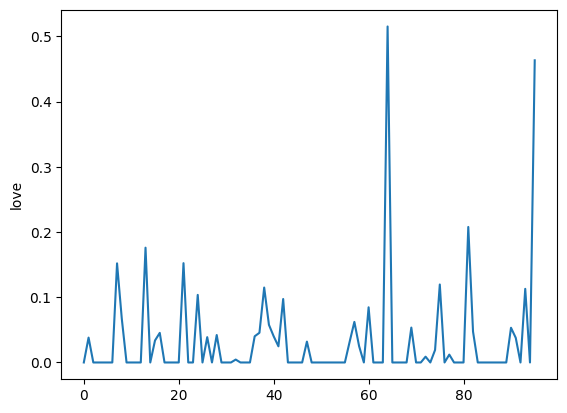

In [45]:
import seaborn as sns
sns.lineplot(tfidf_df['love'])

<Axes: ylabel='women'>

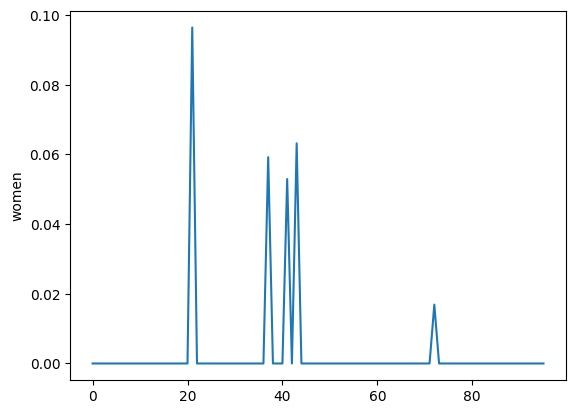

In [46]:
sns.lineplot(tfidf_df['women'])

<Axes: ylabel='yes'>

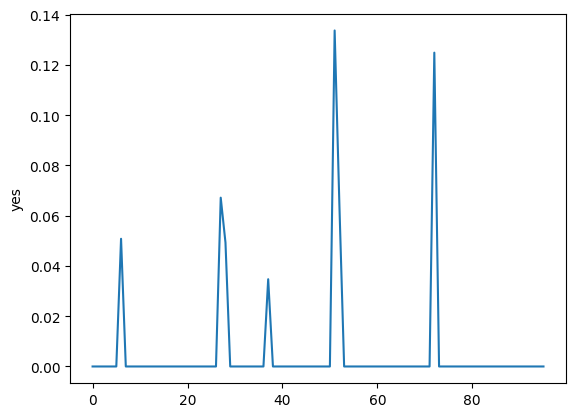

In [47]:
sns.lineplot(tfidf_df['yes'])

<Axes: ylabel='hate'>

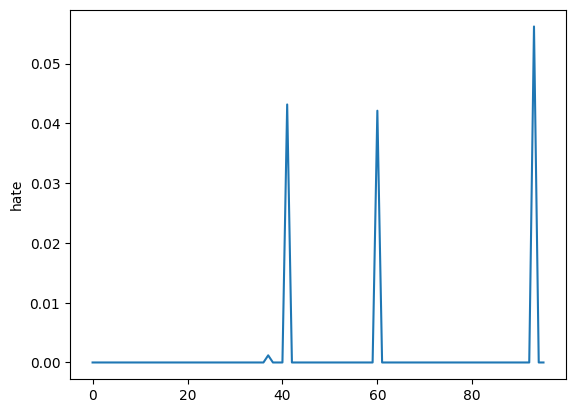

In [168]:
sns.lineplot(tfidf_df['hate'])

In [48]:
tfidf_df.dropna()

,000,10,10 mravinsky,10 story,11,12,12 single,13,17,1800,...,youyou,ysnirvana,ysnirvana nevermindin,zeit,zeppelin,zeppelin ivleftfield,zeppelin led,zombies,zoo,zur
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063454,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html


def get_top_words_per_document(tfidf_df, top_n=10):
    top_words = {}
    
    for index, row in tfidf_df.iterrows():
        top_word_indices = row.nlargest(top_n).index
        top_word_scores = row.nlargest(top_n).values
        
        top_word_list = []
        for i in range(top_n):
            top_word_list.append((top_word_indices[i], top_word_scores[i]))
        
        top_words[index] = top_word_list
    
    return top_words

top_words = get_top_words_per_document(tfidf_df, top_n=10)

for doc_index, words in top_words.items():
    print(f"Document {doc_index}:")
    for word, score in words:
        print(f"  {word}: {score}")


Document 0:
  illyrical: 1.0
  000: 0.0
  10: 0.0
  10 mravinsky: 0.0
  10 story: 0.0
  11: 0.0
  12: 0.0
  12 single: 0.0
  13: 0.0
  17: 0.0
Document 1:
  heaven: 0.37992067619228
  blue: 0.3762106442494116
  nest: 0.34309111379940116
  little: 0.29651647706808715
  makes: 0.2679109571091535
  molly: 0.2573183353495509
  smiling: 0.2573183353495509
  roses: 0.1881053221247058
  face: 0.1826262077198315
  birds: 0.17154555689970058
Document 2:
  making: 0.4918880853893482
  says: 0.35541617656566793
  judge: 0.2794092500377716
  ll: 0.2042061312202186
  makes: 0.1641939232179894
  people: 0.1492342274289066
  hear: 0.14514677734508408
  long: 0.1346643765478592
  bride: 0.10513469961029194
  choir sing: 0.10513469961029194
Document 3:
  ll: 0.3317152667594423
  kiss garden: 0.2732516185954663
  knee: 0.2732516185954663
  pardon: 0.2732516185954663
  showers: 0.2732516185954663
  garden: 0.25568954112901965
  flowers: 0.23093718316020573
  deep: 0.22152677340627333
  chorus: 0.21607949

In [50]:
#top_words

# explore vizualization options!!



## Using SVM to train words to be positive or negative | 
This was more of an experiment to see what happens when I throw a Support Vector Machine model on top of this data, the classification of positive or negative doesn't really work well. If only there was a different way to have classes. A more liquidated response!

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [53]:

sentiment = df['compound']

In [64]:
X = tfidf.fit_transform(cleanedLyricList[4:]) # making my data fit

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, sentiment, test_size=0.2, random_state=42)

import numpy as np
y_train = np.array(y_train).astype(int)
y_test = np.array(y_test).astype(int) # the data 

In [78]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END ................C=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ...................C=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END ................C=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END ................C=0.1, kernel=poly;

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END ..................C=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ..................C=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ....................C=10, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END ..................C=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ..................C=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END .................C=10, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END .................C=10, kernel=poly;, score=1.000 total time=   0.0s
[CV 3/5] END ...................C=10, kernel=poly;, score=nan total time=   0.0s
[CV 4/5] END .................C=10, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5] END .................C=10, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/5] END ..............C=100, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ..............C=100, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END ...............

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py", line 201, in fit
    y = self._validate_targets(y)
        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py", line 749, in _validate_targets
    raise ValueError(
ValueError: The numb

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [70]:
y_pred = grid.best_estimator_.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
# I have a feeling these high results are due to the unbalenced and high variance in the dataset.

Confusion Matrix:
 [[19]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19


Accuracy Score: 1.0


### NOTE: Because there is only instance of the second class (Negative) there is not any point to having a working SVM.